# Programming Project 1 analysis using EDA tools

### Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset and save it to a dataframe named 'df'
df = pd.read_csv('NEWLDC_Timesheet_Project.csv')

### Investigate your dataset using pandas modules and do the tasks. At the end the dataframe will be look like: 
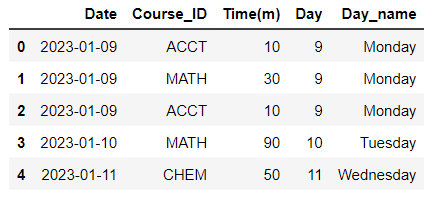

In [3]:
df.head()

,initials,date,course_id,time (m),summary
0,LDC,01/09/2023,DS-160-01,90,Set up GitHub repository and made flashcards o...
1,LDC,01/09/2023,MATH-352-01,120,Class Work Notes
2,LDC,01/10/2023,MATH-321-01,30,Read Chapter 1.1 and 1.2
3,LDC,01/10/2023,PSYC-218-02,60,Chapter 1 Vocabulary List + Quiz
4,LDC,01/10/2023,MATH-321-01,90,Homework Questions


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   initials   67 non-null     object
 1   date       67 non-null     object
 2   course_id  67 non-null     object
 3   time (m)   67 non-null     int64 
 4   summary    67 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.7+ KB


In [5]:
df.tail()

,initials,date,course_id,time (m),summary
62,LDC,02/12/2023,MATH-321-01,60,Revision
63,LDC,02/13/2023,MATH-321-01,180,Revision
64,LDC,02/14/2023,MATH-321-01,180,Revision
65,LDC,02/15/2023,MATH-321-01,180,Revision
66,LDC,02/16/2023,MATH-321-01,180,Revision


In [6]:
# Is there any column you want to drop? If yes which column and why?
df = df.drop('summary', axis=1)
df = df.drop('initials', axis=1)
df.head()

,date,course_id,time (m)
0,01/09/2023,DS-160-01,90
1,01/09/2023,MATH-352-01,120
2,01/10/2023,MATH-321-01,30
3,01/10/2023,PSYC-218-02,60
4,01/10/2023,MATH-321-01,90


I removed the summary and initials columns because they are not useful to my analysis.
It makes it easier to focus on the remaining columns.

In [7]:
# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       67 non-null     datetime64[ns]
 1   course_id  67 non-null     object        
 2   time (m)   67 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ KB


In [8]:
# Calculate the day of the month and create a new column named 'Day'
df['Day'] = df['date'].dt.day
df.head()

,date,course_id,time (m),Day
0,2023-01-09,DS-160-01,90,9
1,2023-01-09,MATH-352-01,120,9
2,2023-01-10,MATH-321-01,30,10
3,2023-01-10,PSYC-218-02,60,10
4,2023-01-10,MATH-321-01,90,10


In [9]:
# Create a new column called Day_name using  .dt.day_name()
df['Day_name'] = df['date'].dt.day_name()
df.head()

,date,course_id,time (m),Day,Day_name
0,2023-01-09,DS-160-01,90,9,Monday
1,2023-01-09,MATH-352-01,120,9,Monday
2,2023-01-10,MATH-321-01,30,10,Tuesday
3,2023-01-10,PSYC-218-02,60,10,Tuesday
4,2023-01-10,MATH-321-01,90,10,Tuesday


### Answer the questions

In [10]:
# What is the average time you have spend for learning?
time = df['time (m)'].mean()
print('Average Time Spent for learning: ', time)

Average Time Spent for learning:  102.46268656716418


In [11]:
# Display all of the entries where you have spent more than the average time to learn 
df.loc[(df['time (m)'] > time)]

,date,course_id,time (m),Day,Day_name
1,2023-01-09,MATH-352-01,120,9,Monday
11,2023-01-13,PSYC-218-02,180,13,Friday
16,2023-01-15,MATH-321-01,180,15,Sunday
17,2023-01-16,MATH-352-01,180,16,Monday
22,2023-01-21,MATH-352-01,120,21,Saturday
23,2023-01-22,DS-160-01,180,22,Sunday
26,2023-01-23,MATH-352-01,150,23,Monday
27,2023-01-24,MATH-321-01,340,24,Tuesday
29,2023-01-25,MATH-352-01,120,25,Wednesday
30,2023-01-25,MATH-321-01,120,25,Wednesday


In [12]:
# Which course you have spent the maximum time to prepare?
time_max = df['time (m)'].max()

df1 = df.loc[(df['time (m)'] == time_max)]
print('Course with most time spent: ', df1['course_id'].to_string(index=False))

Course with most time spent:  MATH-321-01


In [13]:
# Which day of the week you spent the most time?
day = df['Day_name'].value_counts()
day1 = day[:1]
print('The day I spent the most time: ', day1)

The day I spent the most time:  Tuesday    13
Name: Day_name, dtype: int64


### Investigate the distribution of Time, adding the mean. How the data distributed?
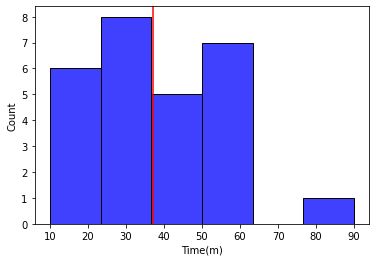

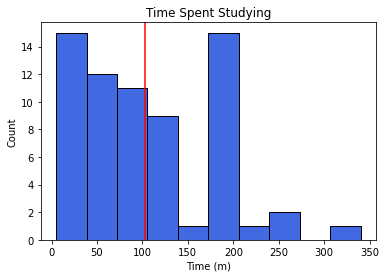

In [14]:
plt.hist(df['time (m)'],
        color = 'royalblue',
        edgecolor = 'black')
plt.xlabel('Time (m)')
plt.ylabel('Count')
plt.title('Time Spent Studying')

mean = df['time (m)'].mean()
plt.axvline(mean, color = 'red')

plt.show()

The average time spent studying for a subject is approximately 100 minutes (1 hour 40 minutes). The distribution is bimodal (has two peaks) and not symmetric. The distribution of the data is slightly positively right skewed as it has a long tail to the right. 

### Investigate Total time by Day using bar plot - Remove the Confidence Interval - By Course ID. Comment on your findings
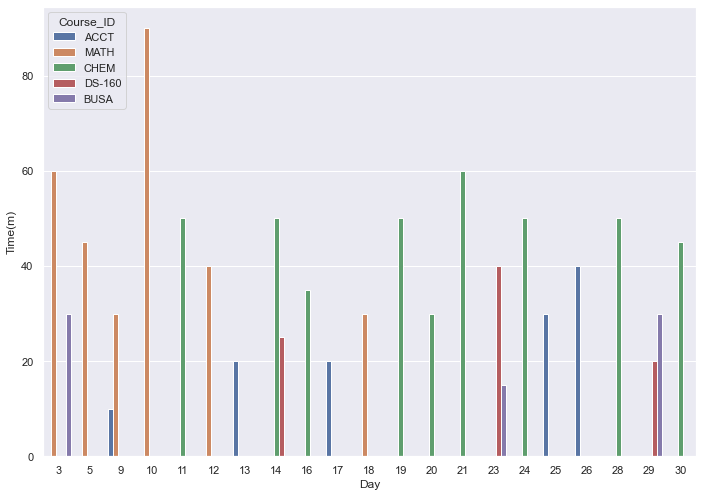

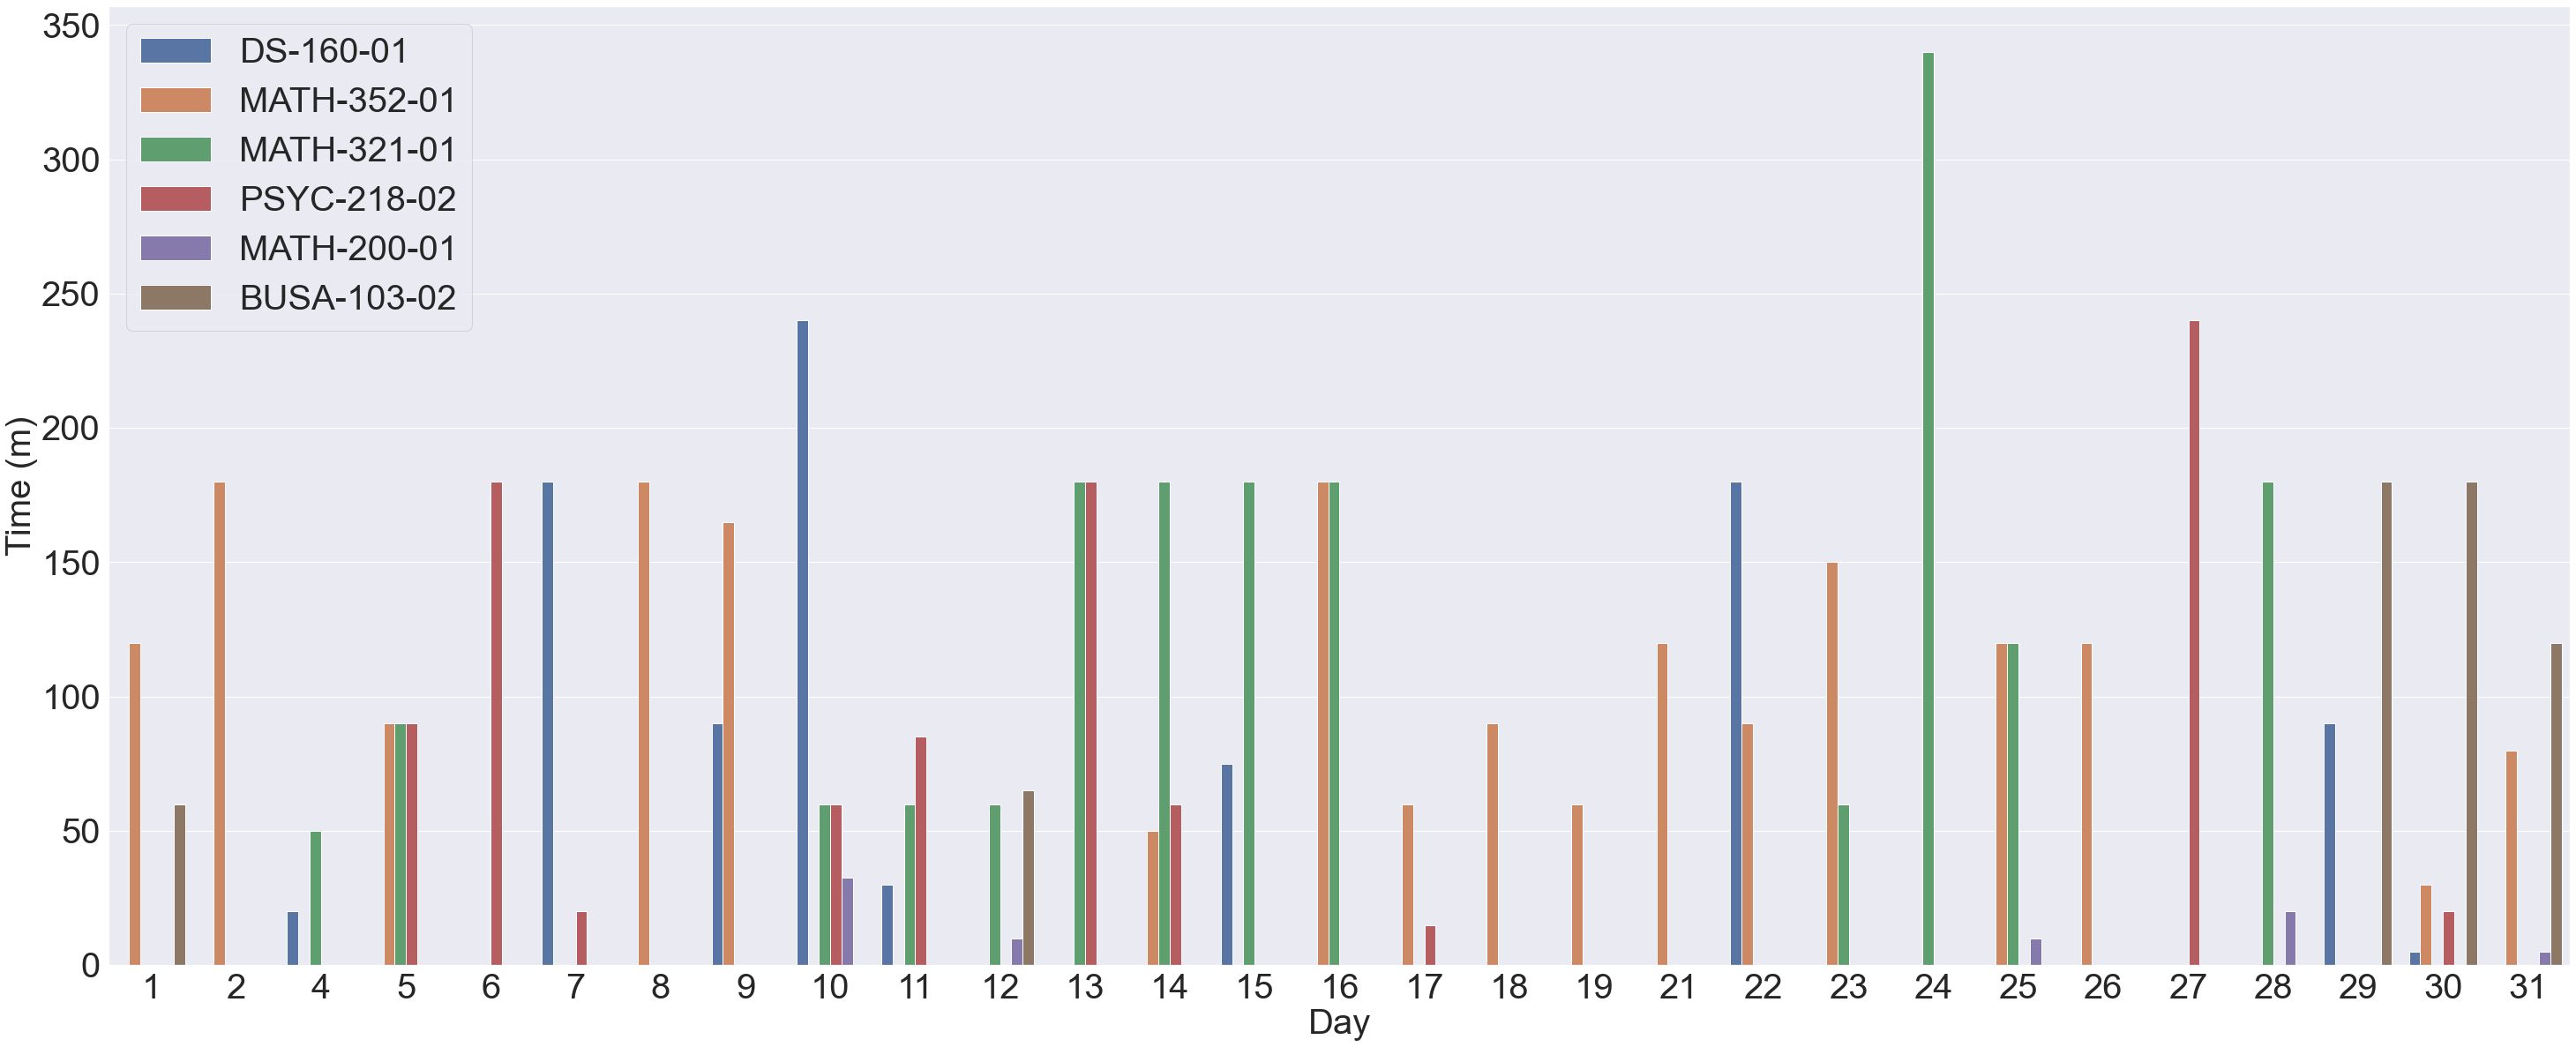

In [30]:
sns.set(rc = {'figure.figsize': (50,20)})

sns.barplot(x = df['Day'],
           y = df['time (m)'],
           hue = df['course_id'],
           ci = False)

plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)

plt.xlabel('Day', fontsize = 40)
plt.ylabel('Time (m)', fontsize = 40)

plt.legend(loc=2, prop={'size': 40})
plt.show()

#### Blue = 8, Orange = 17, Green = 13, Red = 10, Purple = 5, Brown = 5

I spent the most time on is MATH-321-01 on day 24.
In addition, I spent the least amount of time on DS-160-01 and MATH-200-01, on day 28 and day 31 respectively. Furthermore, the course I studied for most frequently throughout this time period was MATH-352-01. The courses I studied for least frequently were MATH-200-01 and BUSA-103-02. Another thing to note is that during day 17 to day 26, the main courses that were focused on predominantly were MATH-352-01 and MATH-321-01. There is less of a variety of courses studied for per day during this time period, as opposed to the other days.

### Investigate the measure of dispersion (table and plot) of time column.
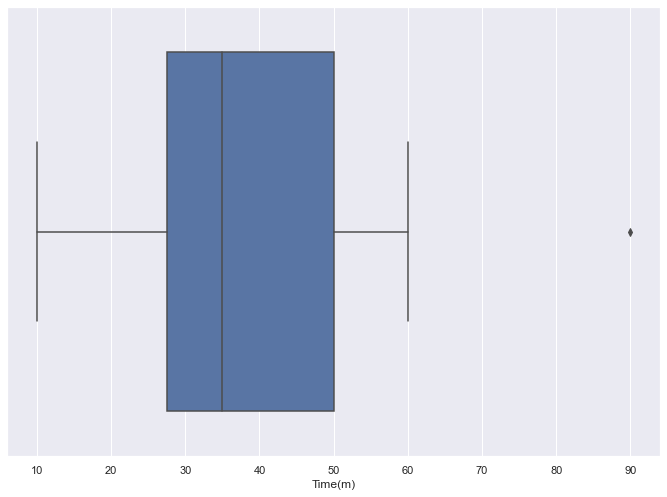

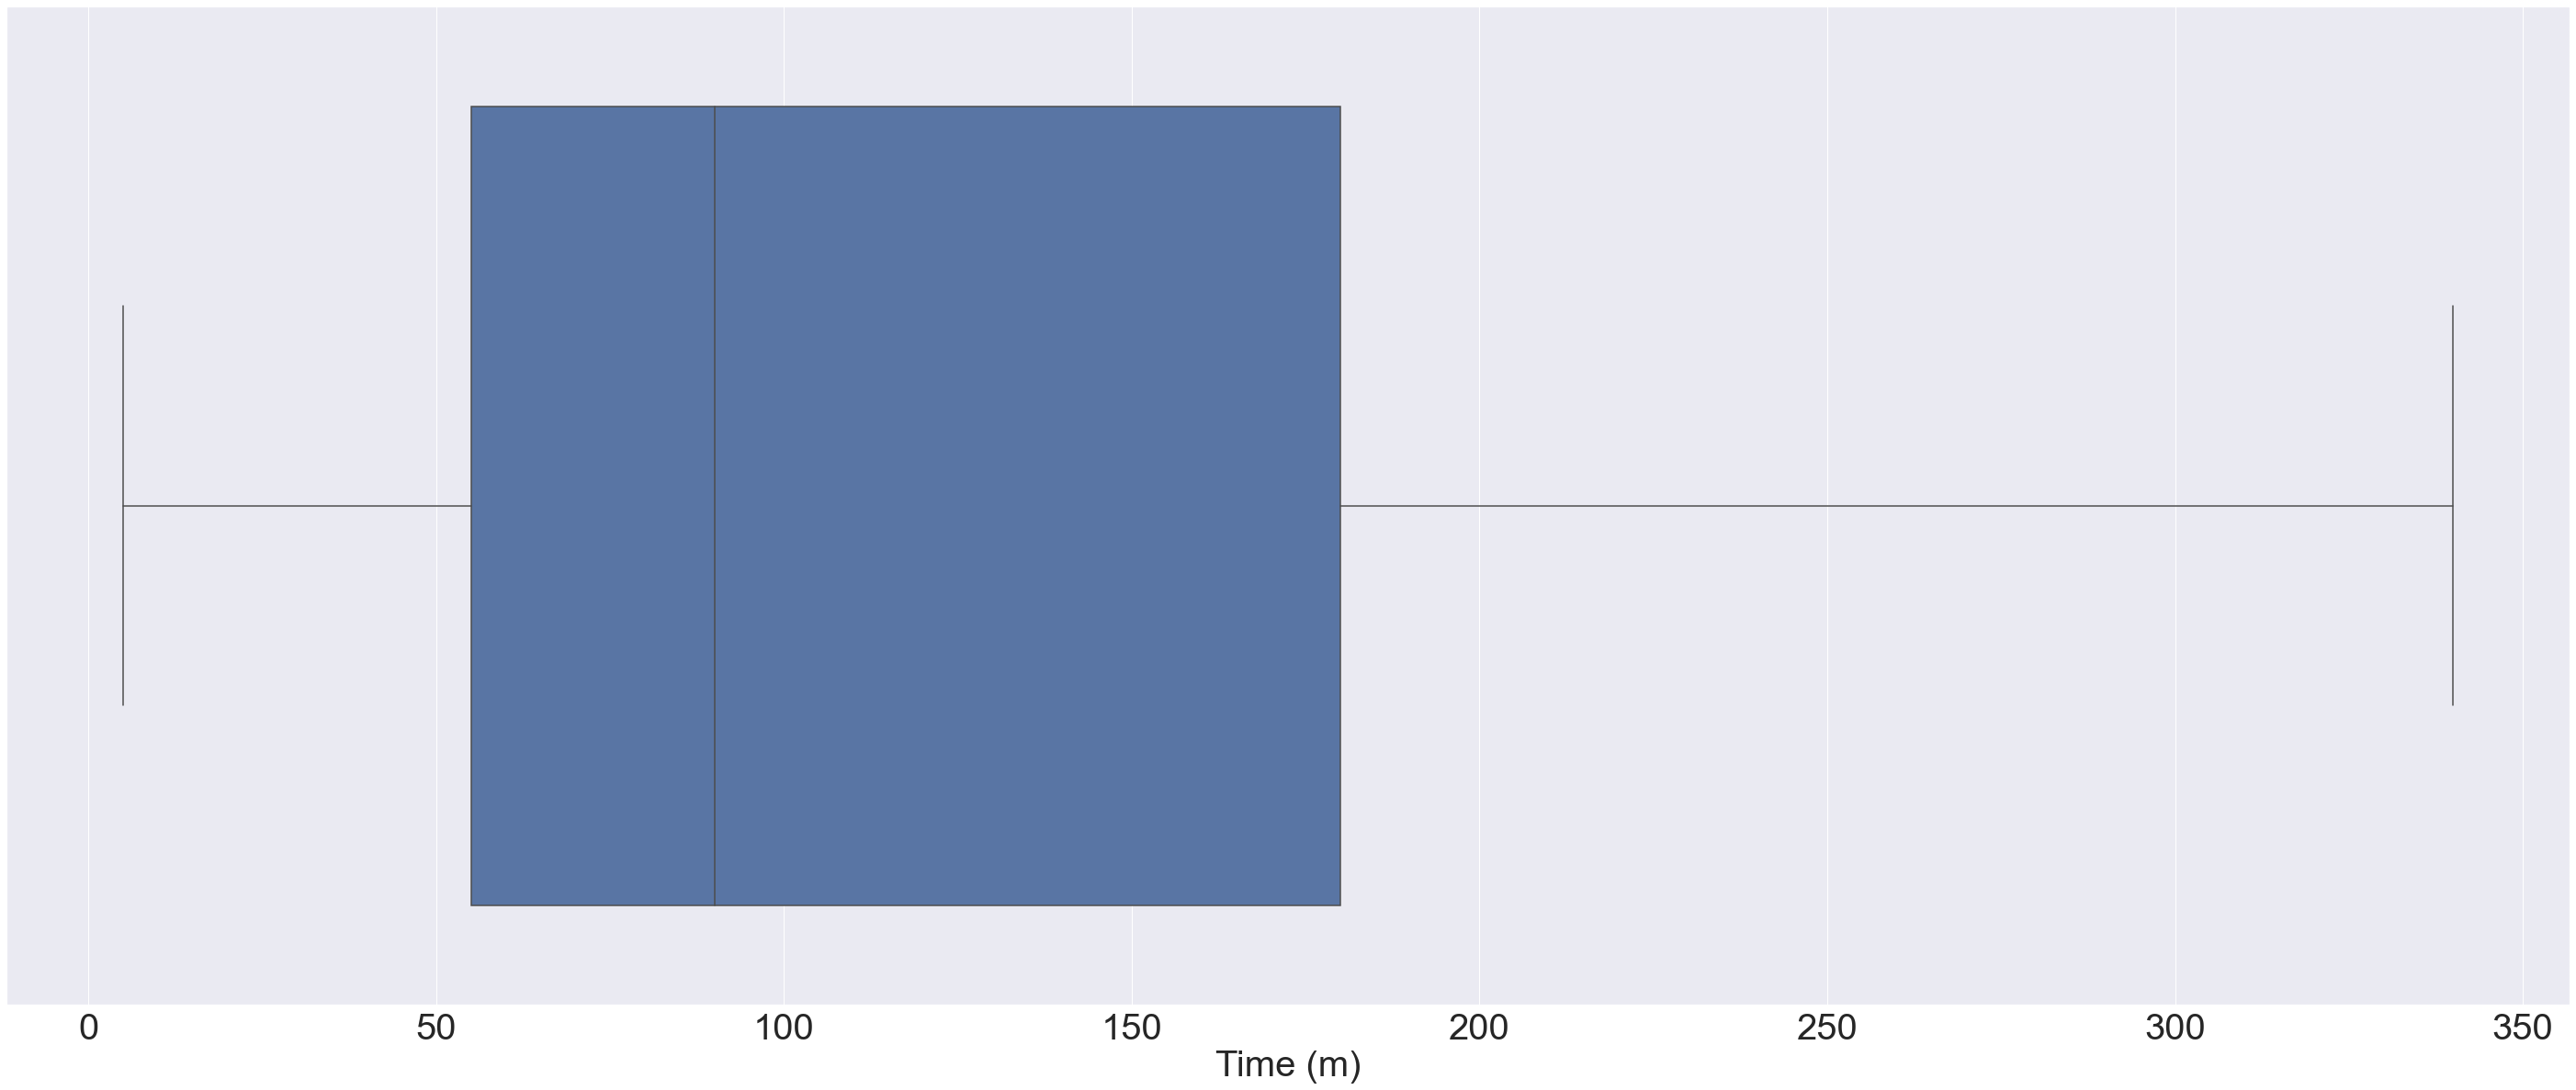

In [36]:
sns.boxplot(x = 'time (m)', data = df)

plt.xticks(fontsize = 40)
plt.xlabel('Time (m)', fontsize = 40)

plt.show()

The minimum amount of time spent studying was 5 minutes and the maximum amount of time spent studying was 340 minutes. The median amount of time spent was 90 minutes. The 25% quartile was 55 minutes and the 75% quartile was 180 minutes. There are no outliers.

In [43]:
df['time (m)'].describe()

count     67.000000
mean     102.462687
std       71.749634
min        5.000000
25%       55.000000
50%       90.000000
75%      180.000000
max      340.000000
Name: time (m), dtype: float64

### Investigate the the distribution of time by Day_name
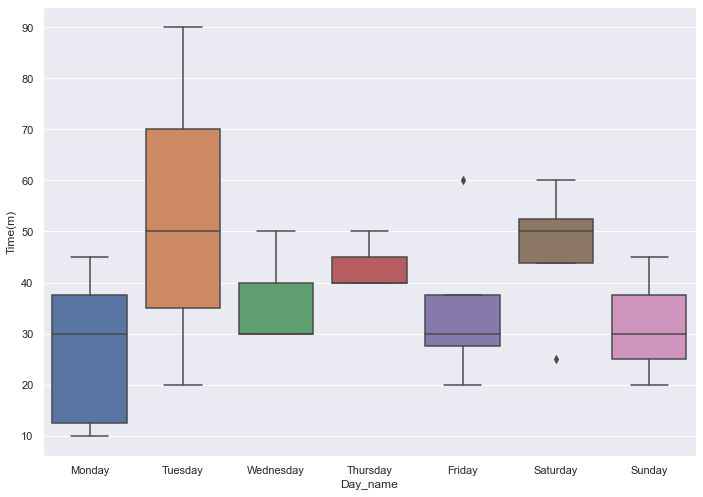

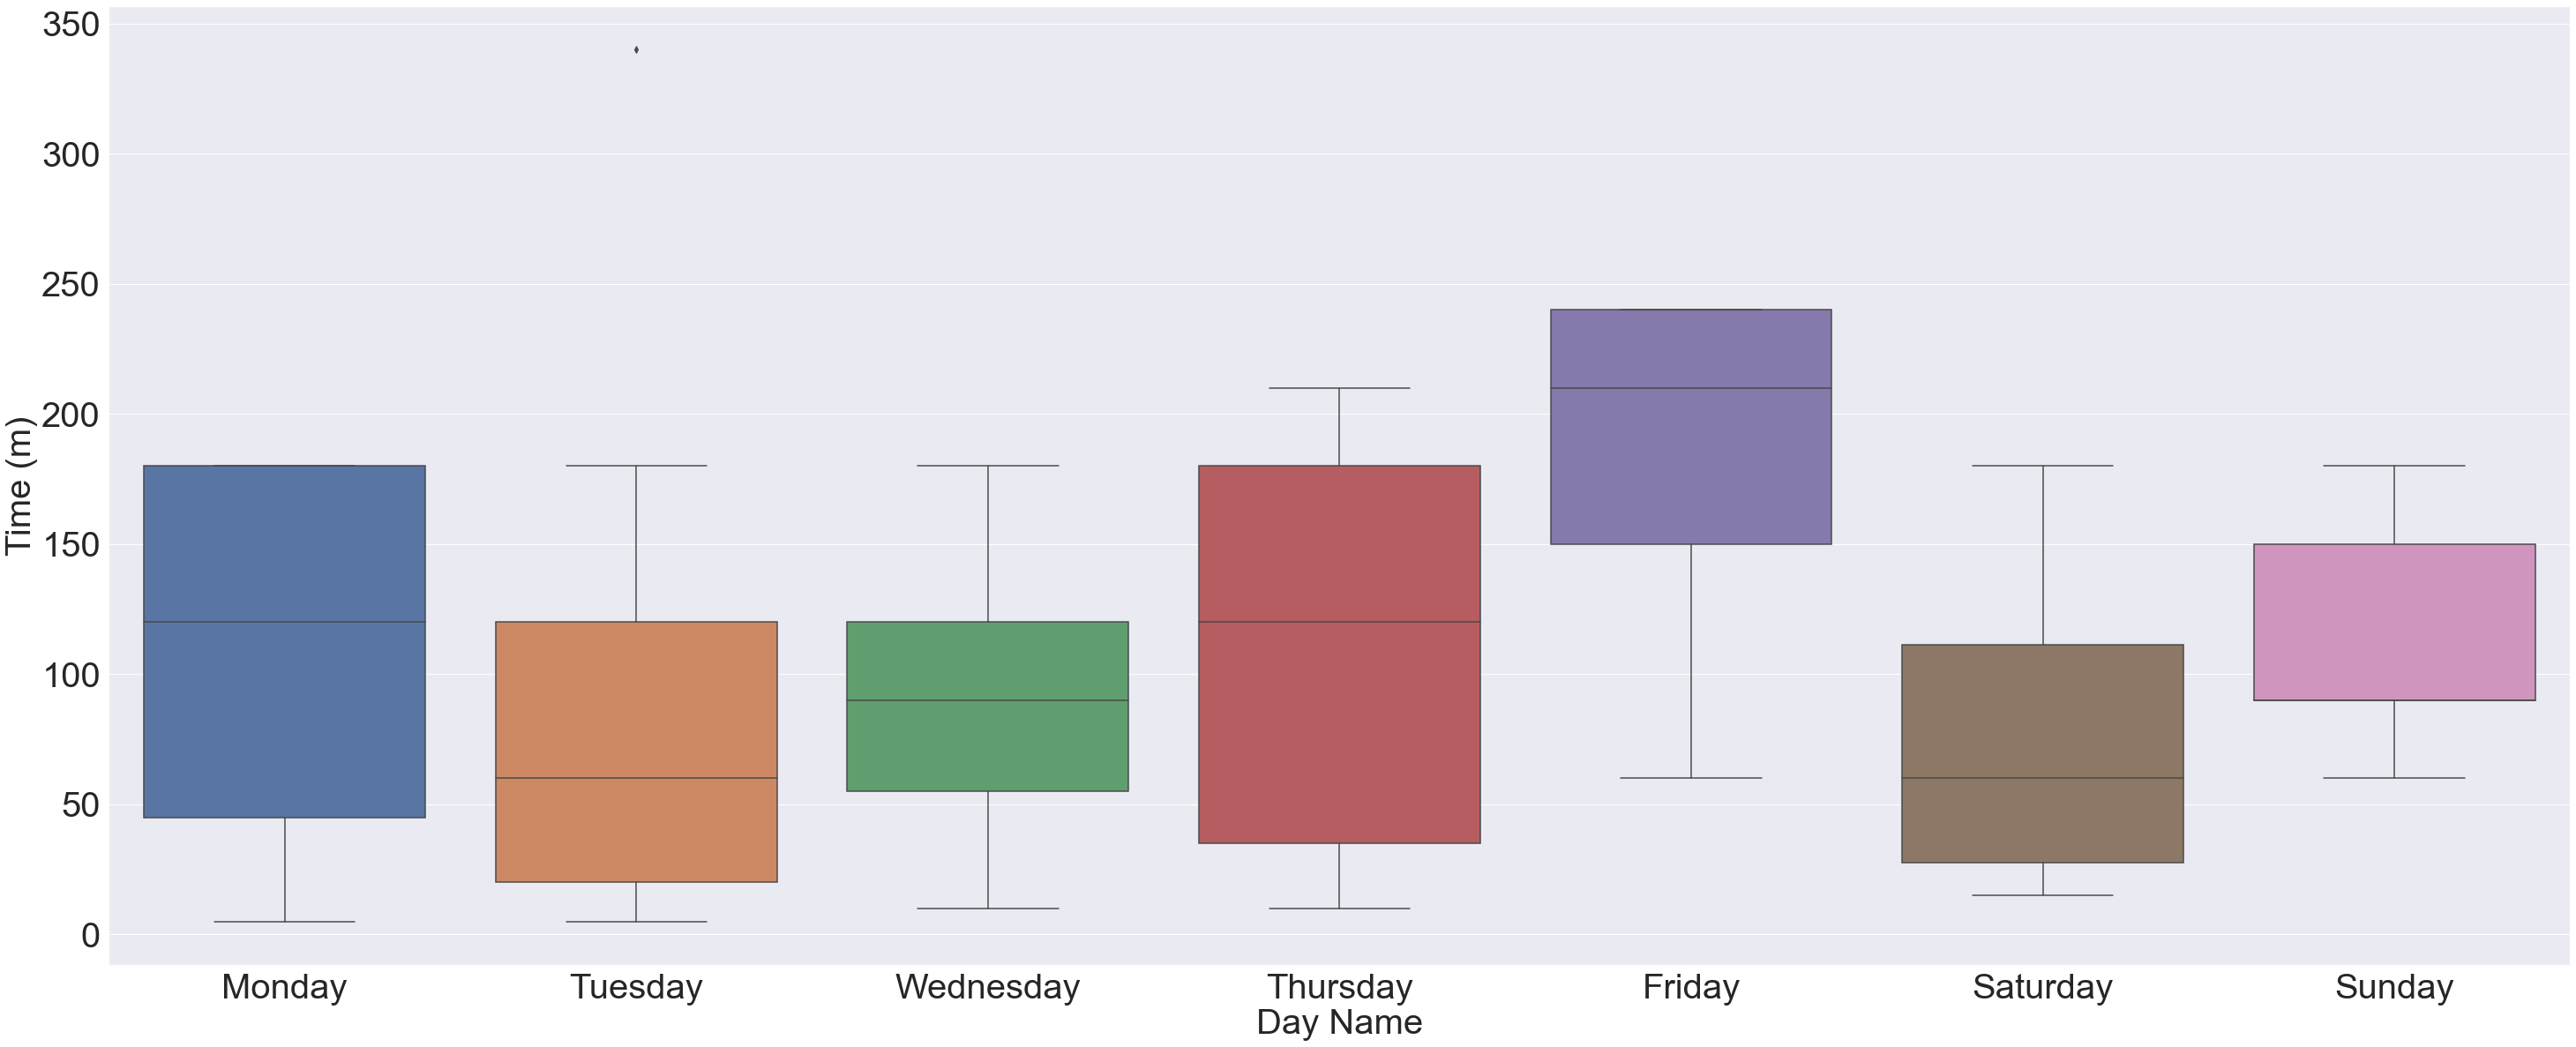

In [48]:
sns.boxplot(x = 'Day_name',
           y = 'time (m)',
           data = df)

plt.xlabel('Day Name', fontsize = 40)
plt.xticks(fontsize = 40)
plt.ylabel('Time (m)', fontsize = 40)
plt.yticks(fontsize = 40)

plt.show()

There is a higher spread of data for time spent studying on Monday and Thursday, as opposed to Wednesday, Friday, Saturday and Sunday. The day that has the highest median for the amount of time is Friday. Additionally, the day that has the lowest median for the amount of time studying is Tuesday.

### Use lmplots to plot Day and Time , remove error bar, add hue and display by column
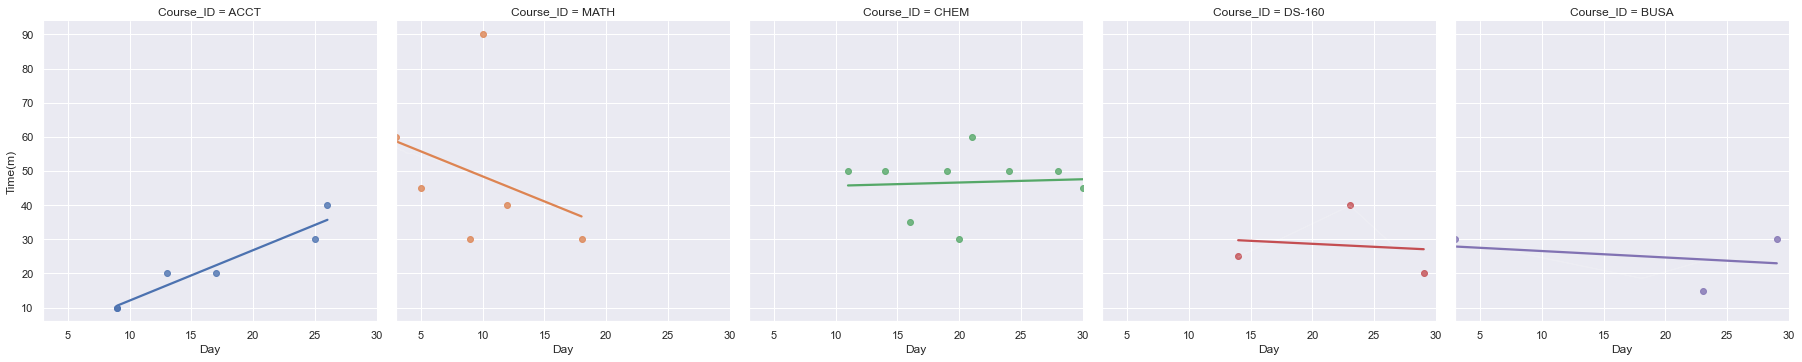

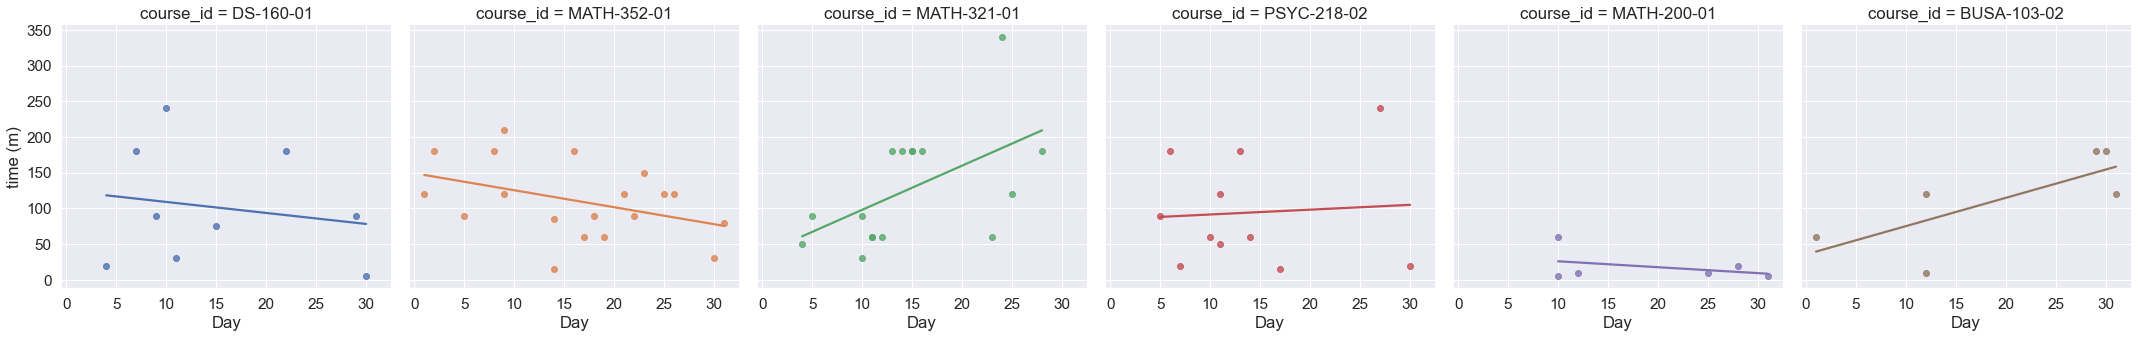

In [77]:
sns.lmplot(x = 'Day', y = 'time (m)', data = df, hue = 'course_id', ci = False, col = 'course_id')

plt.show()

### Create a pair plot of Day and Time and add course id as hue
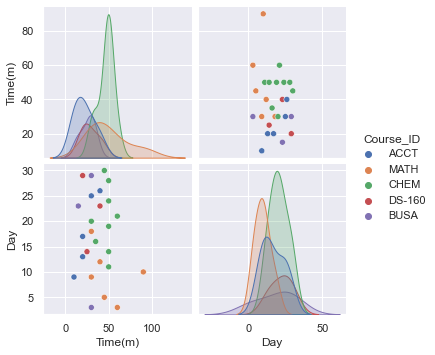

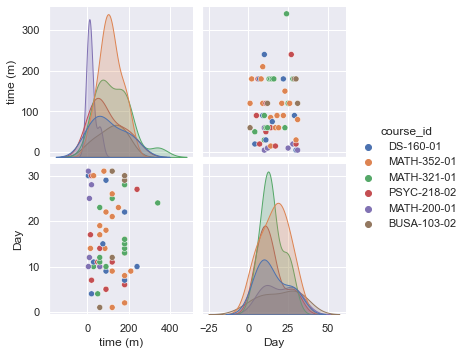

In [66]:
sns.pairplot(df, hue = 'course_id')
plt.show()

### Display the Heatmap and comment on your findings
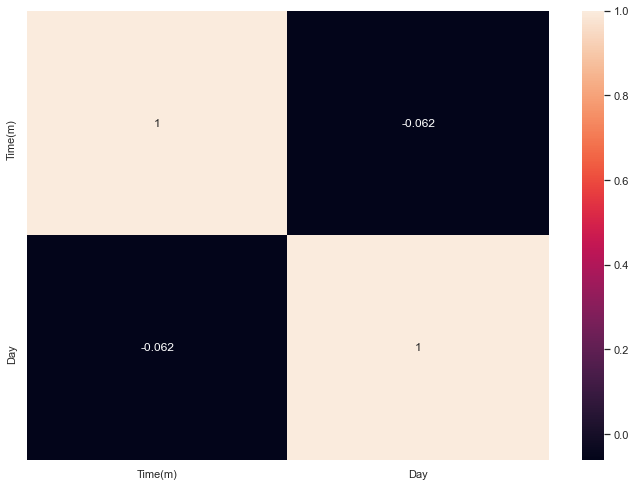

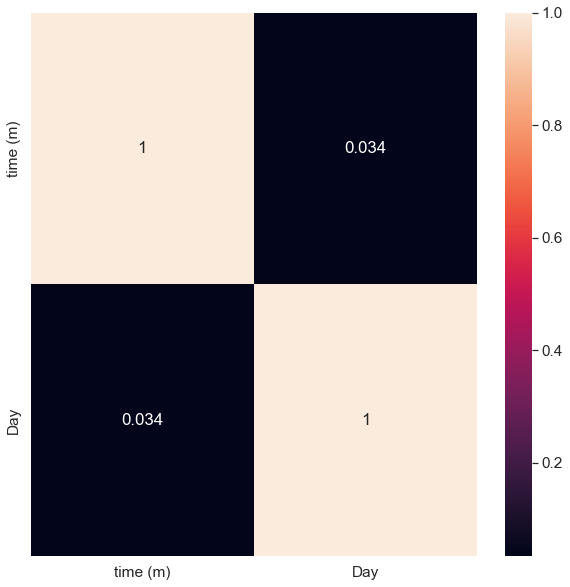

In [75]:
corr = df[['time (m)', 'Day']].corr(method='pearson')
cols = ['time (m)', 'Day']

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot = True, xticklabels = cols, yticklabels = cols)
plt.show()

There is no correlation between time spent studying and the day of the week. There is a perfect correlation between day and day, and time and time.